In [1]:
#https://vincentarelbundock.github.io/Rdatasets/datasets.html
#Heating System Choice in California Houses
#read in the CSV file as available on the site
heating <- read.csv(file="Documents/heating.csv", header=TRUE, sep=",")

# make sure the data is laid out the way we expect
head(heating)

X,idcase,depvar,ic.gc,ic.gr,ic.ec,ic.er,ic.hp,oc.gc,oc.gr,...,oc.hp,income,agehed,rooms,region,pb.gc,pb.gr,pb.ec,pb.er,pb.hp
1,1,gc,866.00,962.64,859.90,995.76,1135.50,199.69,151.72,...,237.88,7,25,6,ncostl,4.336722,6.344846,1.554017,1.969462,4.773415
2,2,gc,727.93,758.89,796.82,894.69,968.90,168.66,168.66,...,199.19,5,60,5,scostl,4.315961,4.499526,1.531639,1.839072,4.864200
3,3,gc,599.48,783.05,719.86,900.11,1048.30,165.58,137.80,...,171.47,4,65,2,ncostl,3.620486,5.682511,1.639548,2.223922,6.113606
4,4,er,835.17,793.06,761.25,831.04,1048.70,180.88,147.14,...,222.95,2,50,4,scostl,4.617260,5.389833,1.576087,1.954377,4.703745
5,5,er,755.59,846.29,858.86,985.64,883.05,174.91,138.90,...,178.49,2,25,6,valley,4.319879,6.092801,2.123736,2.530396,4.947336
6,6,gc,666.11,841.71,693.74,862.56,859.18,135.67,140.97,...,209.27,6,65,7,scostl,4.909781,5.970845,1.742102,2.324709,4.105605


In [2]:
# there is a DOC (HTML) file on the same site that describes the columns
# change the column names to be more readable
colnames(heating)[colnames(heating)=="depvar"] <- "system"
colnames(heating)[colnames(heating)=="ic.gc"] <- "install_cost"
colnames(heating)[colnames(heating)=="oc.gc"] <- "annual_cost"
colnames(heating)[colnames(heating)=="pb.gc"] <- "ratio_annual_install"

# remove columns which are not used
heating$idcase <- NULL
heating$ic.gr <- NULL
heating$ic.ec <- NULL
heating$ic.hp <- NULL
heating$ic.er <- NULL
heating$oc.gr <- NULL
heating$oc.ec <- NULL
heating$oc.hp <- NULL
heating$oc.er <- NULL
heating$pb.gr <- NULL
heating$pb.ec <- NULL
heating$pb.er <- NULL
heating$pb.hp <- NULL

# check the data layout again now that we have made changes
head(heating)

X,system,install_cost,annual_cost,income,agehed,rooms,region,ratio_annual_install
1,gc,866.00,199.69,7,25,6,ncostl,4.336722
2,gc,727.93,168.66,5,60,5,scostl,4.315961
3,gc,599.48,165.58,4,65,2,ncostl,3.620486
4,er,835.17,180.88,2,50,4,scostl,4.617260
5,er,755.59,174.91,2,25,6,valley,4.319879
6,gc,666.11,135.67,6,65,7,scostl,4.909781


In [3]:
# get rough statistics on the data
summary(heating)

       X         system    install_cost     annual_cost         income     
 Min.   :  1.0   ec: 64   Min.   : 431.8   Min.   : 84.02   Min.   :2.000  
 1st Qu.:225.8   er: 84   1st Qu.: 696.3   1st Qu.:155.75   1st Qu.:3.000  
 Median :450.5   gc:573   Median : 778.5   Median :172.10   Median :5.000  
 Mean   :450.5   gr:129   Mean   : 776.8   Mean   :172.12   Mean   :4.641  
 3rd Qu.:675.2   hp: 50   3rd Qu.: 855.3   3rd Qu.:189.18   3rd Qu.:6.000  
 Max.   :900.0            Max.   :1158.9   Max.   :248.43   Max.   :7.000  
     agehed          rooms          region    ratio_annual_install
 Min.   :20.00   Min.   :2.000   mountn:102   Min.   :3.146       
 1st Qu.:30.00   1st Qu.:3.000   ncostl:260   1st Qu.:4.193       
 Median :45.00   Median :4.000   scostl:361   Median :4.504       
 Mean   :42.94   Mean   :4.424   valley:177   Mean   :4.548       
 3rd Qu.:55.00   3rd Qu.:6.000                3rd Qu.:4.854       
 Max.   :65.00   Max.   :7.000                Max.   :8.646       

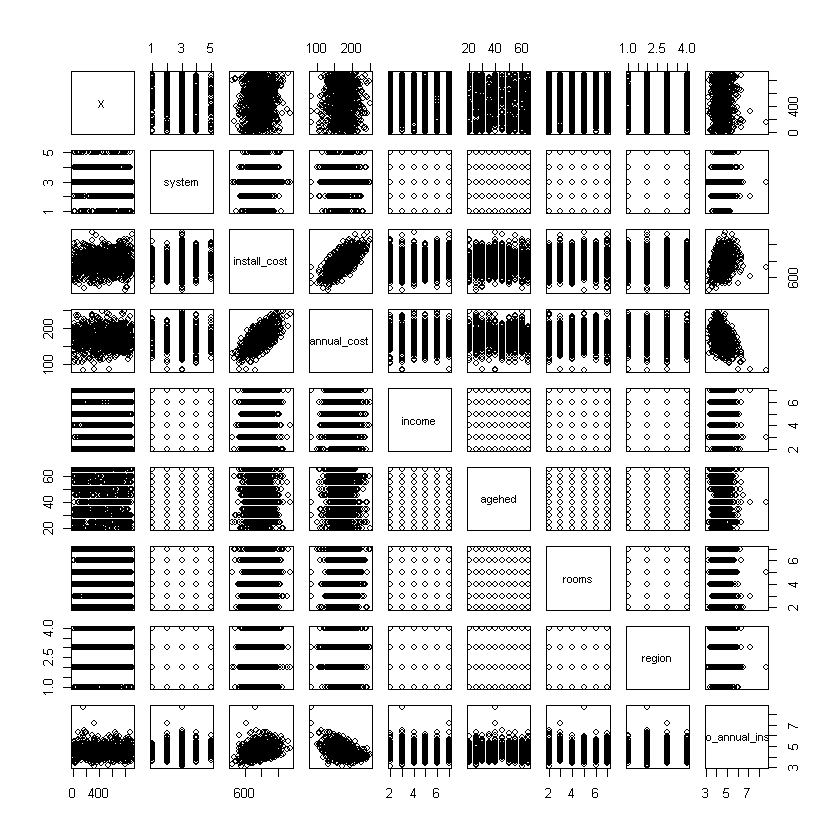

In [4]:
# put together a plot showing possible relationships among the data points
plot(heating)

In [5]:
# initial cost varies widely within type of system
# annual cost as well
# costs vary widely within customer income, age, rooms in house, region
# only relationship appears to be intial cost of system and annual cost
cov(heating$install_cost, heating$annual_cost) 

[1] 2131.224